In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from tensorflow import keras
from keras import layers
from keras.callbacks import EarlyStopping

Se cargan la base de datos MNIST. \\
En las imágenes de MNIST, los píxeles tienen valores en el rango de 0 a 255, donde 0 representa un píxel negro y 255 representa un píxel blanco. Al dividir cada valor de píxel por 255.0, estamos escalando todos los valores al rango [0, 1]

In [30]:
# Cargar y preparar los datos de MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalizar los datos

x_train_5 toma las imagenes que son 5 del conjunto original. \\
x_train_not_5 toma imagenes que son son 5 pero esta limitado a la misma cantidad que tiene x_train_5. \\
Se concatenan los dos conjuntos en uno que ahora tiene misma cantidad de cincos y no cincos, con lo que esta balanceado este conjunto.

In [31]:
# Filtrar datos para cincos y no-cincos
x_train_5 = x_train[y_train == 5]
x_train_not_5 = x_train[y_train != 5][:len(x_train_5)]
x_train_balanced = np.concatenate([x_train_5, x_train_not_5])

Se crea el conjunto de etiquetas y_train_5 con misma cantidad de de etiquetas 1 que las imágenes que hay de cincos. \\
Analogamente se crea un conjunto de etiquetas y_train_not_5 con etiquetas 0. \\
Se obtiene el conjunto de etiquetas balanceadas al combinar los anteriores conjuntos.

In [32]:
y_train_5 = np.ones(len(x_train_5))
y_train_not_5 = np.zeros(len(x_train_not_5))
y_train_balanced = np.concatenate([y_train_5, y_train_not_5])

In [33]:
# Dividir datos en entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x_train_balanced, y_train_balanced, test_size=0.2, random_state=42)

Se configuran dos capas en la arquitectura de la red, una primera con dos neuronas y la de salida con una neurona. \\
Para la primera capa se uso la función de activación ReLU (Rectified Linear Unit) la cual es recomendada para problemas de clasificación, accelera el entrenamiento y aprende características complejas en las capas ocultas. \\
Para la segunda capa se implemento la función de activación Sigmoid, la cual se ve comúnmente en la capa de salida de modelos de clasificación binaria. Comprime los valores a un rango entre 0 y 1, produciendo una salida que puede interpretarse como una probabilidad, si el valor es mayor a 0.5, se predice como cinco, de lo contrario, se predice como no cinco.

In [34]:
# Construir el modelo
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(2, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [35]:
# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Se prefirio usar 'val_loss' porque es una métrica comúnmente utilizada para Early Stopping porque proporciona una indicación directa de la capacidad del modelo para generalizar a nuevos datos y evita el sobreajuste. Además 'val_loss' tiende a ser menos propenso a fluctuaciones abruptas (ruido en los datos) en comparación con 'accuracy'.

In [36]:
# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

Hiperparámetros a gusto del cocinero.

In [37]:
# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/25
272/272 [==============================] - 2s 4ms/step - loss: 0.5333 - accuracy: 0.7710 - val_loss: 0.4404 - val_accuracy: 0.8709
Epoch 2/25
272/272 [==============================] - 1s 5ms/step - loss: 0.3989 - accuracy: 0.9040 - val_loss: 0.3713 - val_accuracy: 0.9078
Epoch 3/25
272/272 [==============================] - 1s 3ms/step - loss: 0.3402 - accuracy: 0.9256 - val_loss: 0.3222 - val_accuracy: 0.9258
Epoch 4/25
272/272 [==============================] - 1s 3ms/step - loss: 0.2956 - accuracy: 0.9405 - val_loss: 0.2832 - val_accuracy: 0.9433
Epoch 5/25
272/272 [==============================] - 1s 3ms/step - loss: 0.2587 - accuracy: 0.9482 - val_loss: 0.2500 - val_accuracy: 0.9484
Epoch 6/25
272/272 [==============================] - 1s 3ms/step - loss: 0.2272 - accuracy: 0.9550 - val_loss: 0.2215 - val_accuracy: 0.9557
Epoch 7/25
272/272 [==============================] - 1s 3ms/step - loss: 0.2019 - accuracy: 0.9581 - val_loss: 0.2002 - val_accuracy: 0.9571
Epoch 

In [38]:
# Evaluar el modelo
y_pred = model.predict(x_val)
y_pred_binary = (y_pred > 0.5).astype(int)

68/68 [==============================] - 1s 1ms/step


Graficación del historico de accuracy y loss para el entrenamiento y validación.

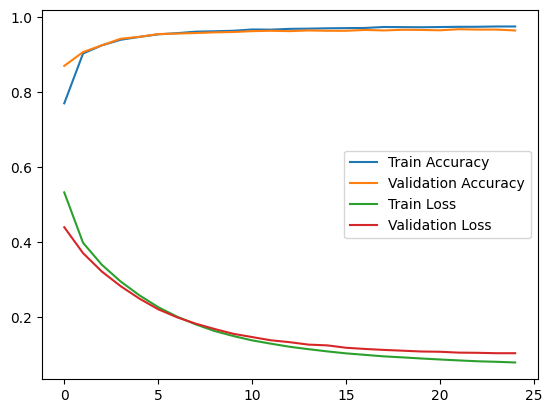

In [39]:
# Graficar historico de accuracy y loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

80 imagenes donde la clasificación fue erronea.


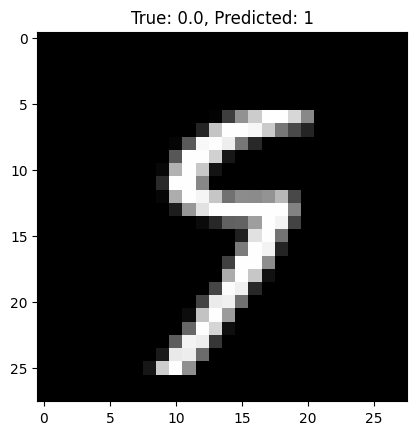

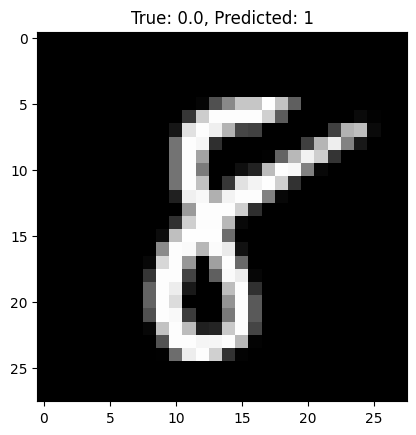

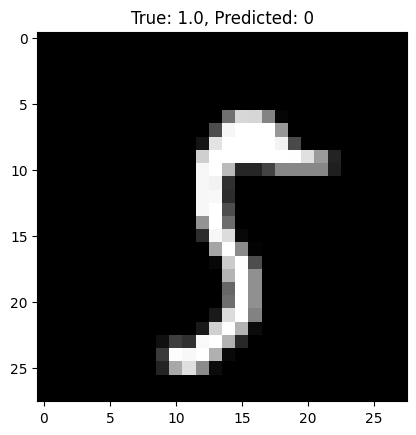

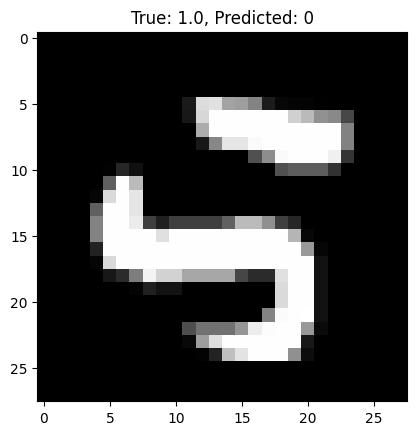

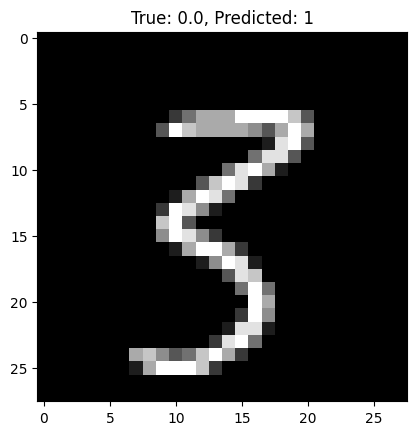

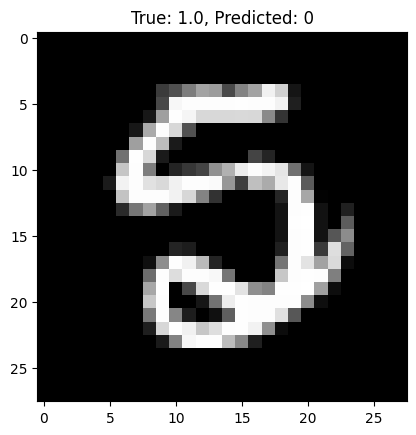

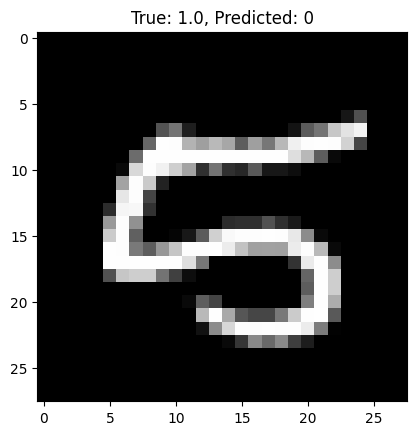

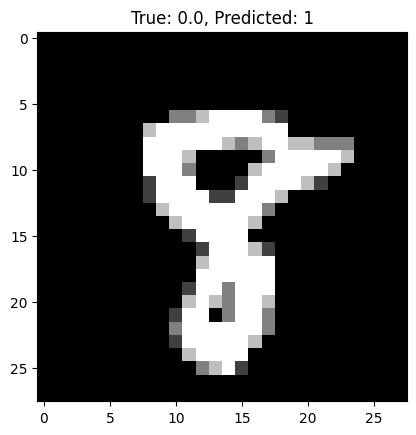

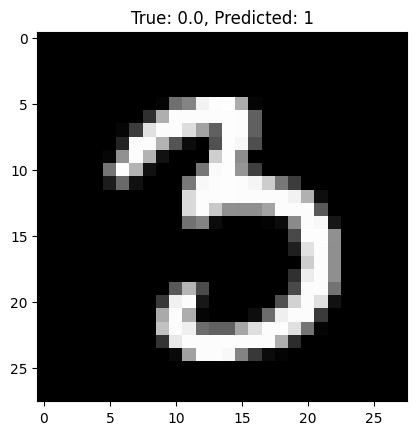

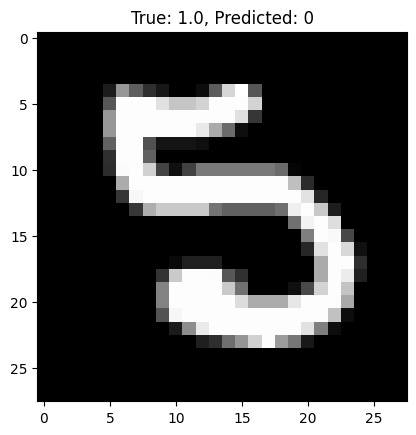

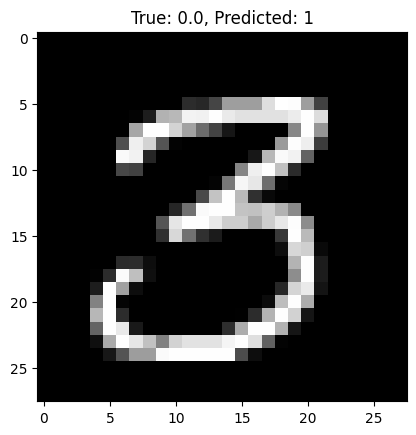

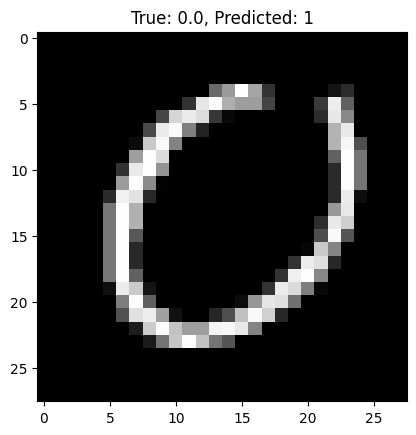

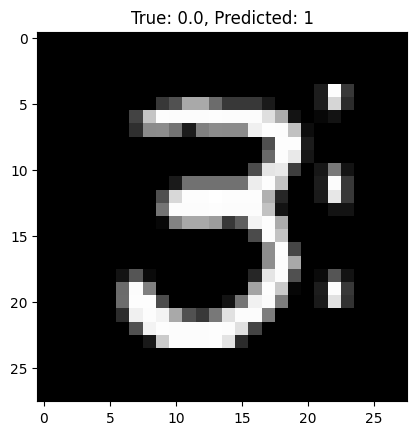

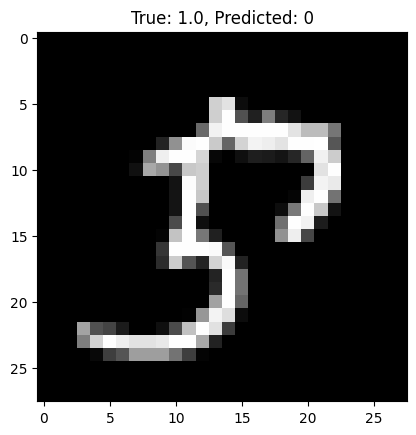

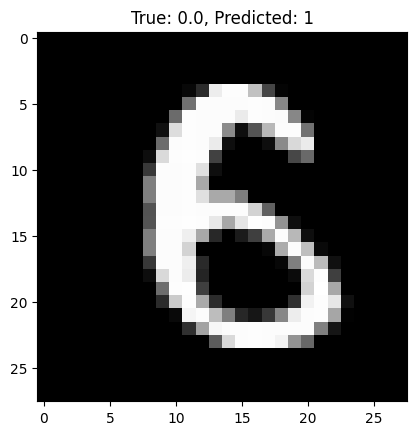

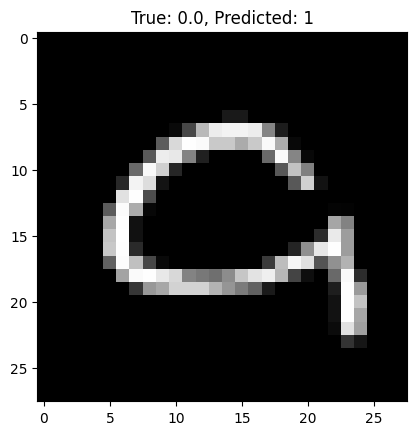

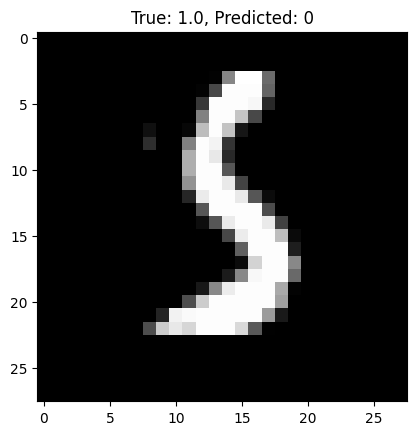

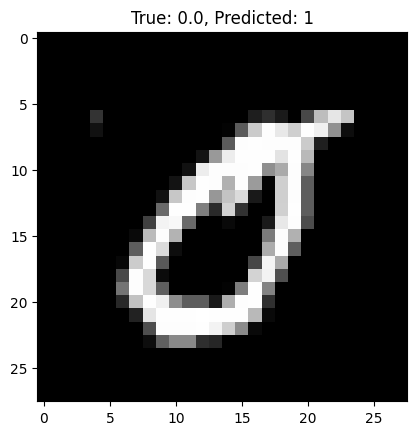

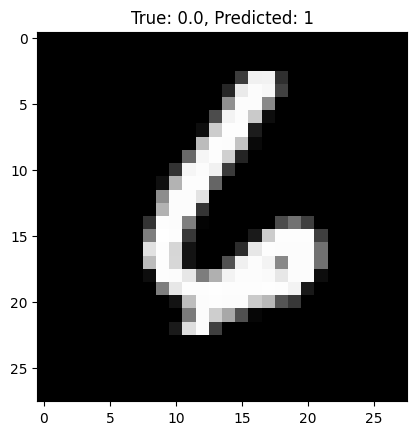

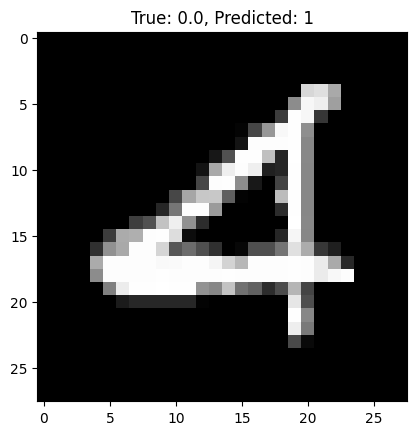

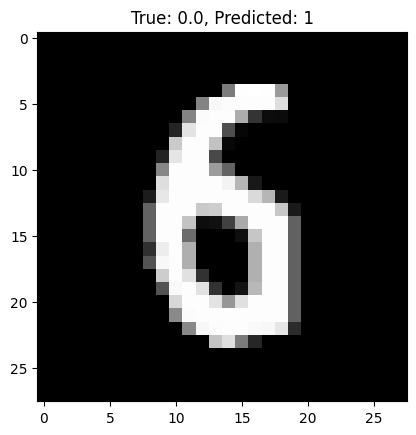

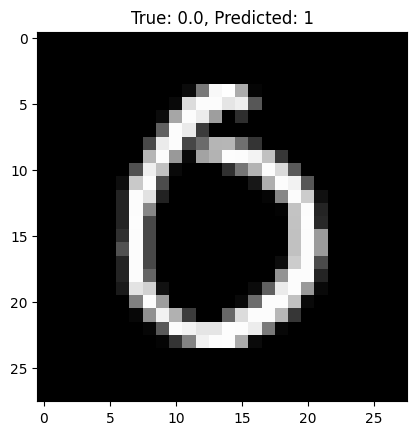

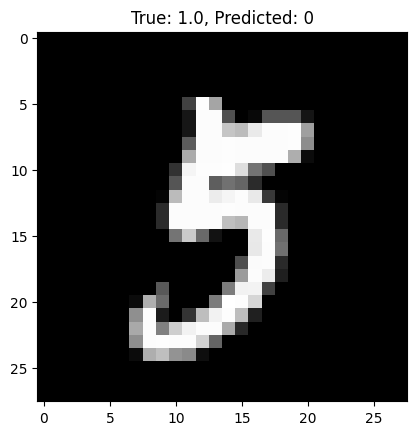

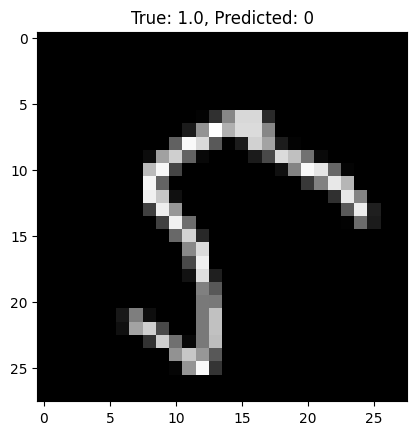

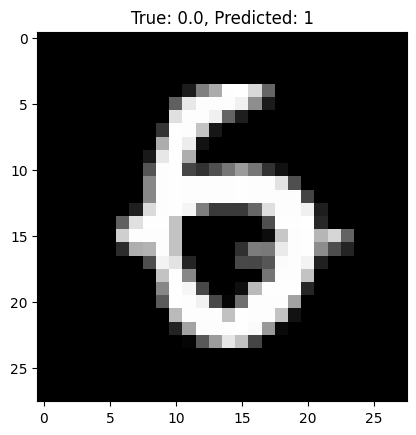

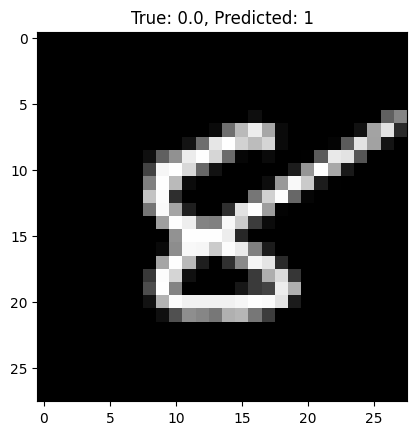

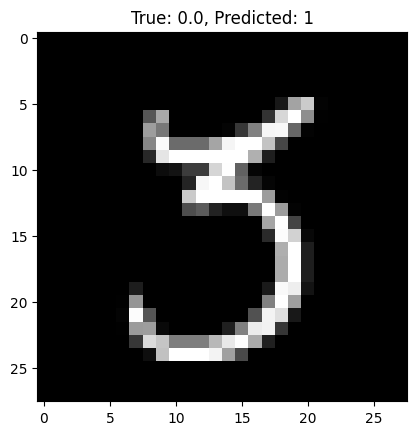

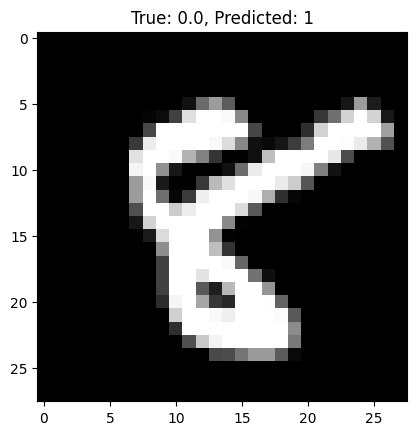

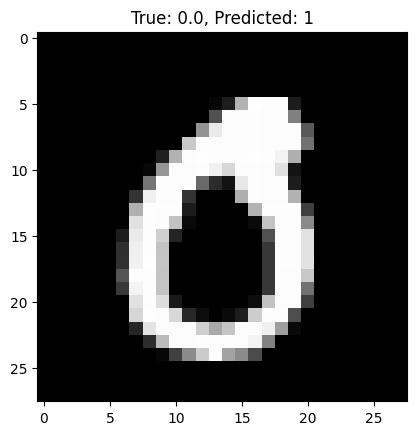

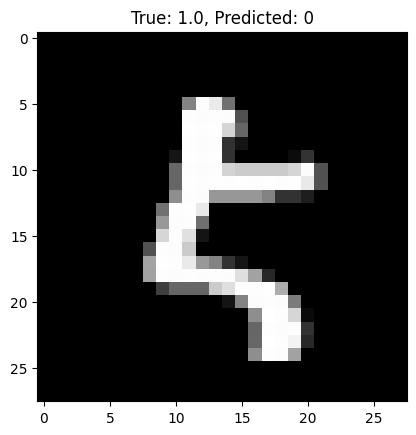

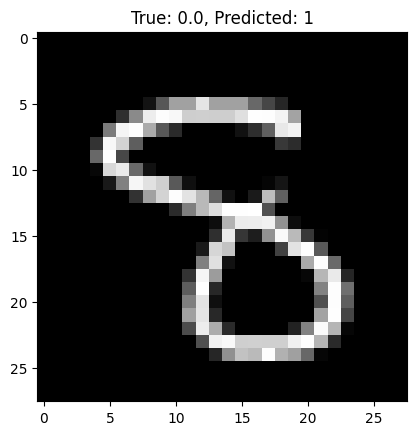

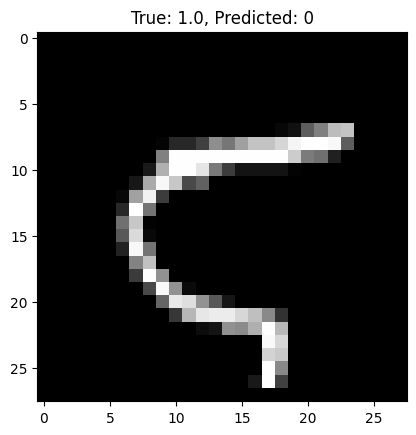

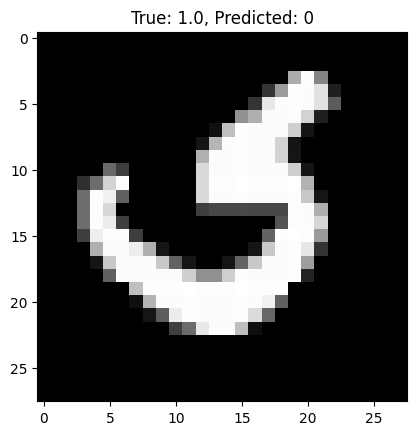

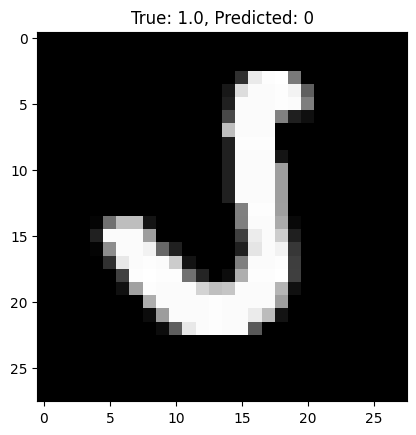

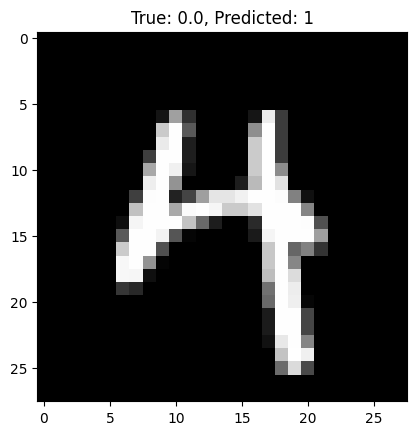

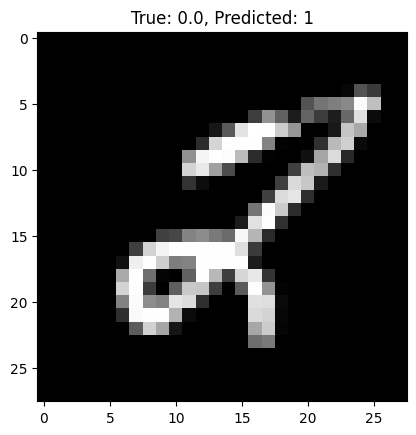

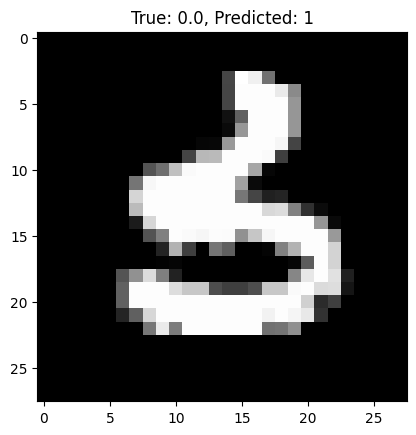

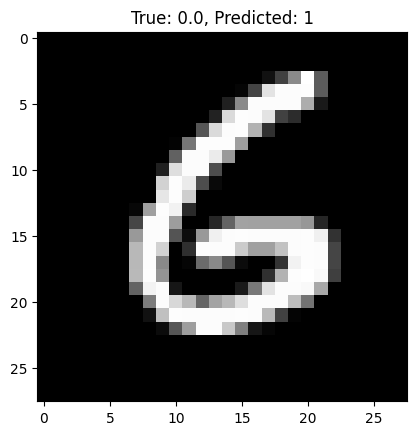

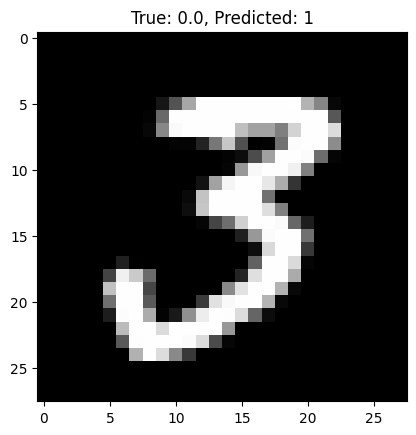

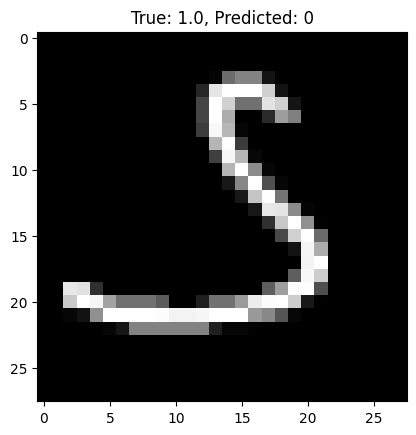

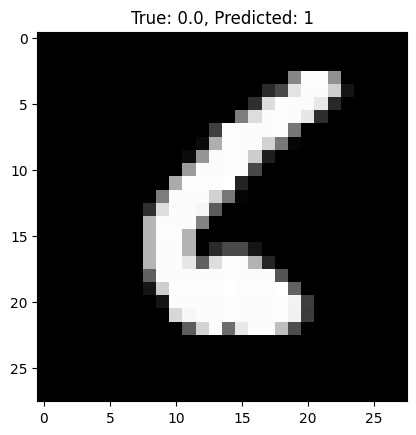

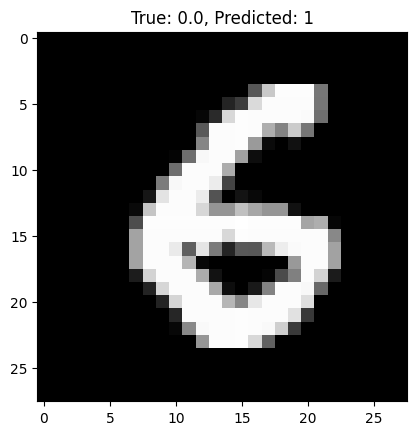

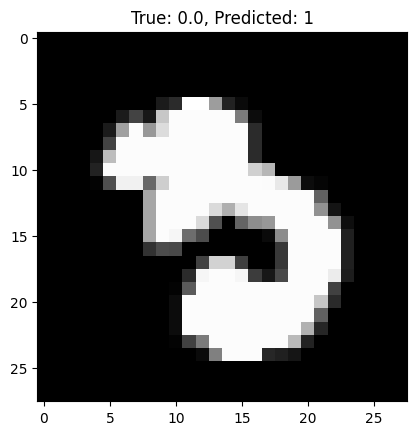

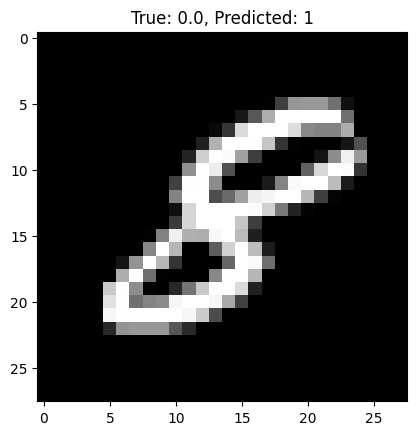

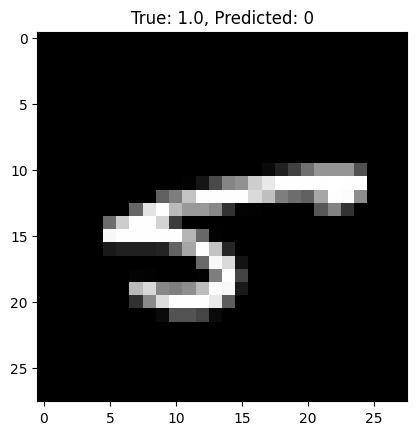

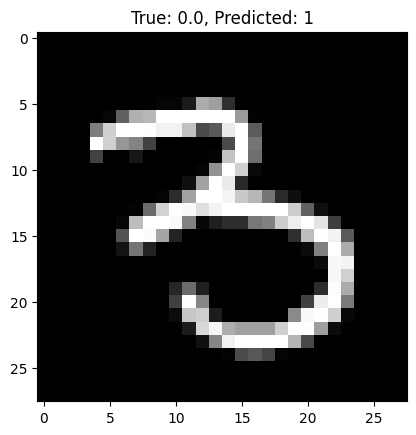

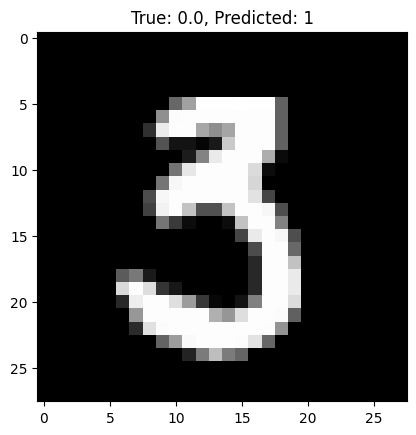

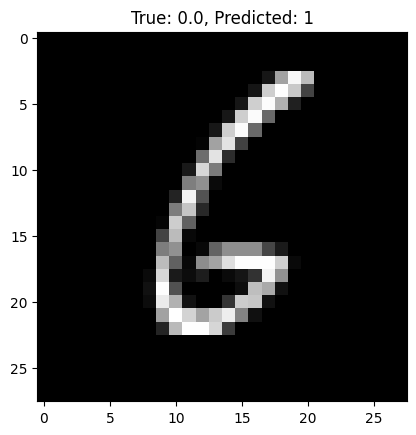

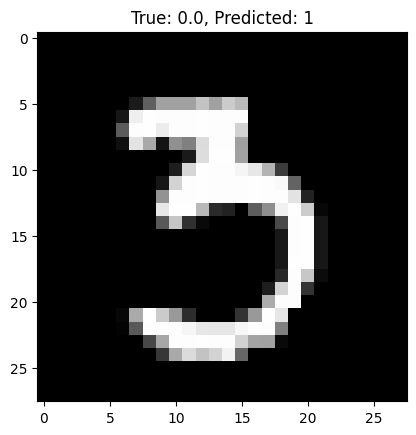

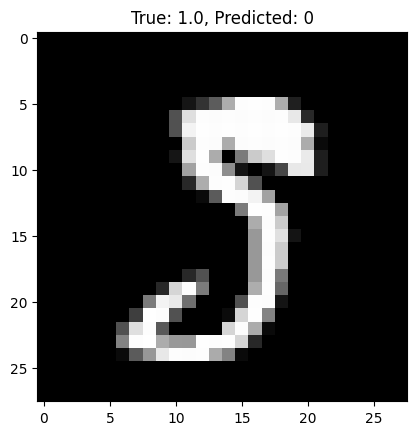

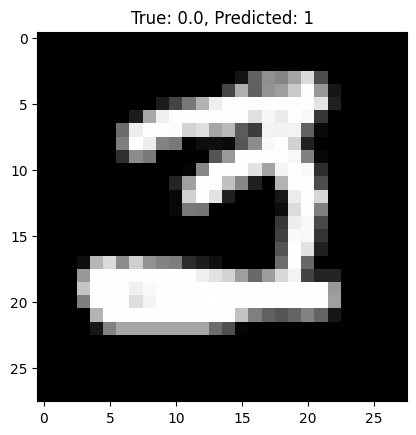

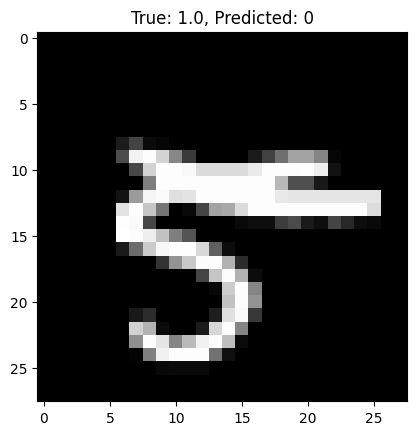

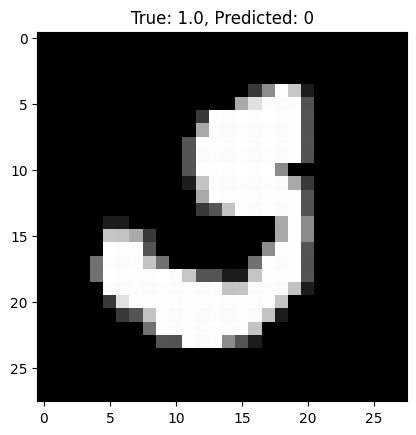

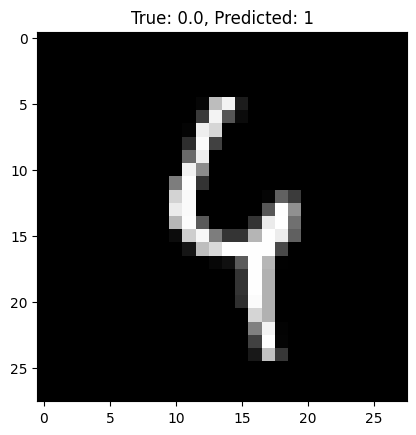

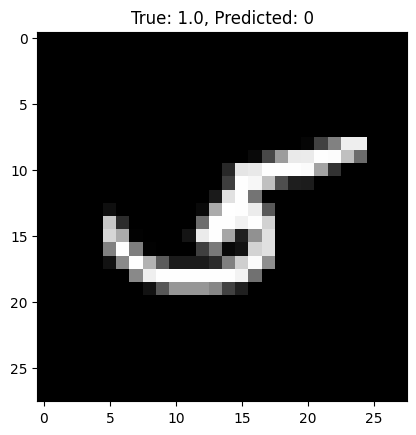

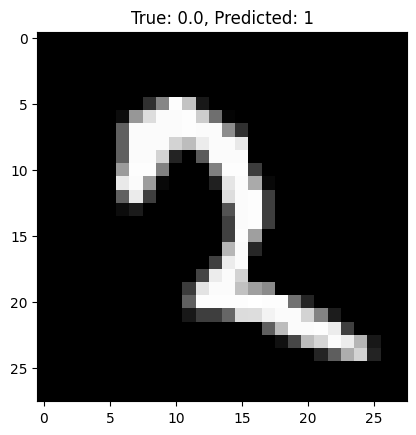

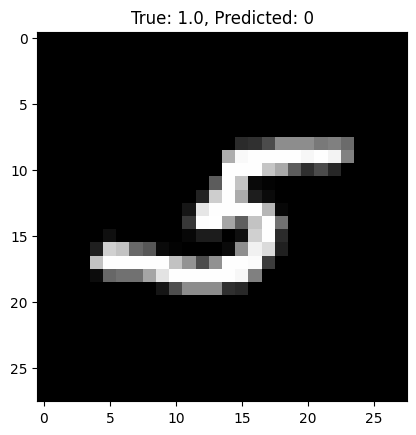

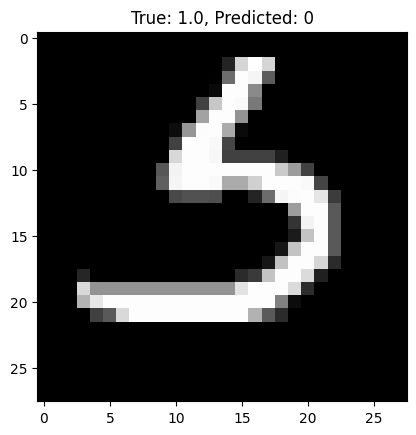

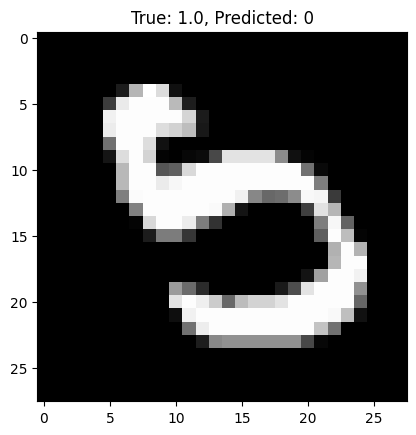

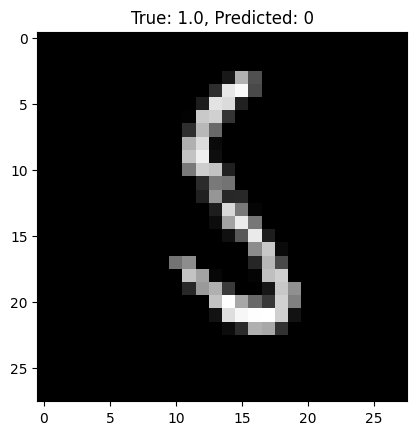

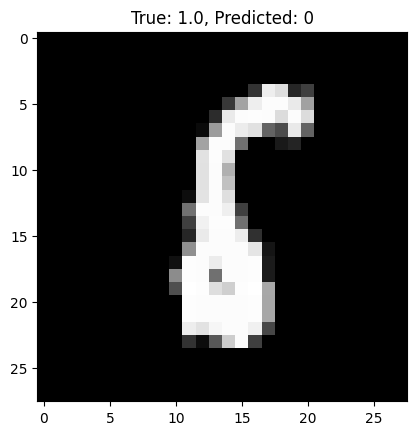

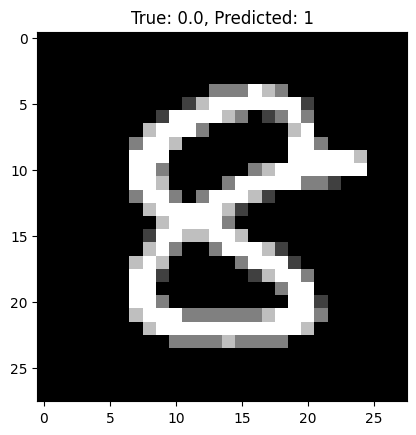

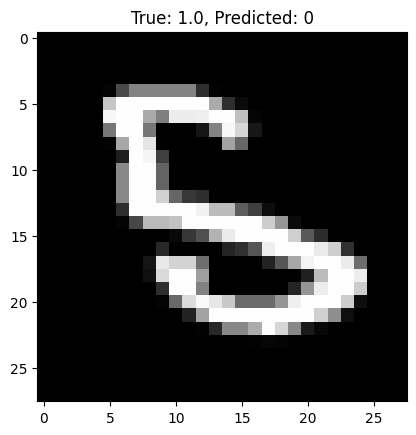

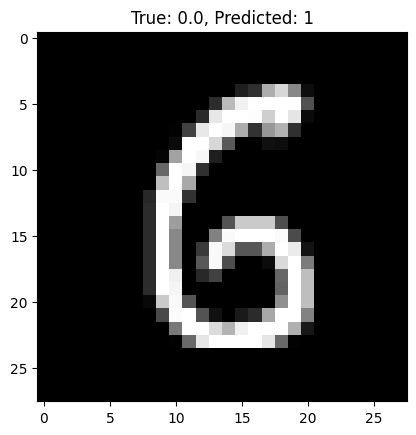

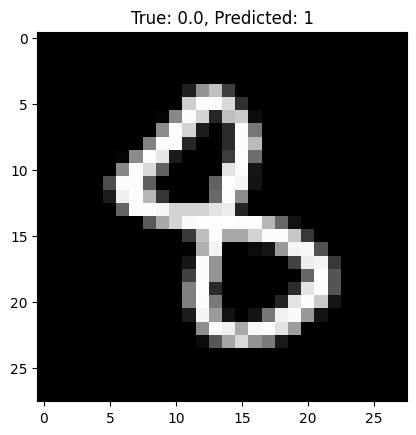

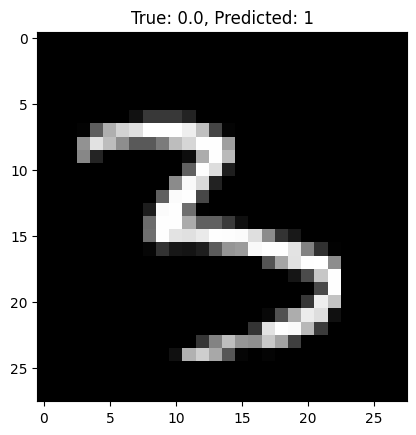

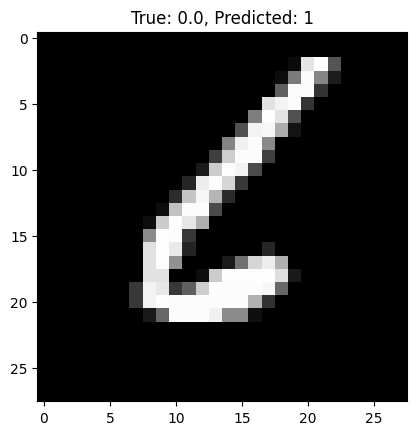

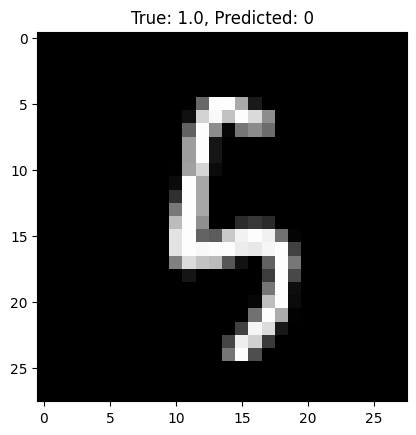

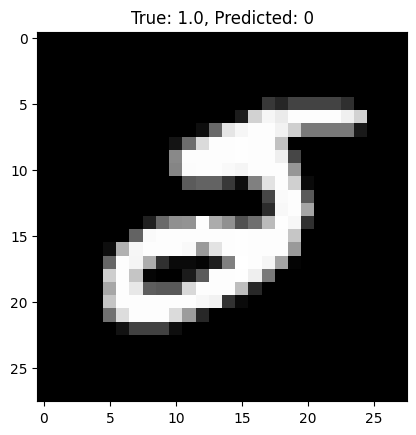

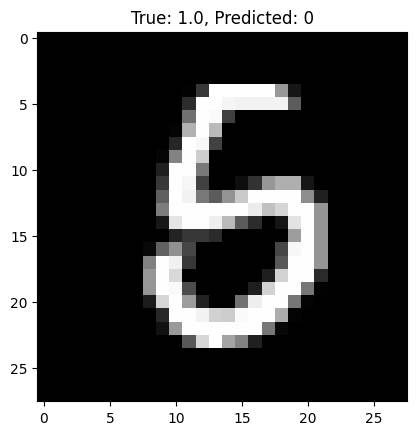

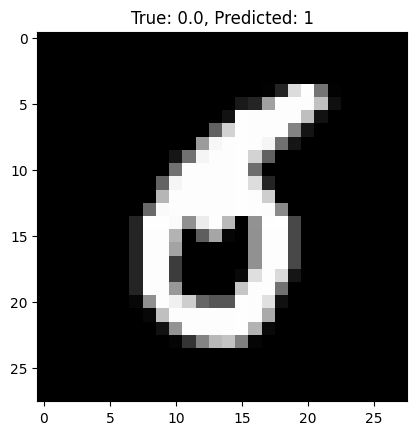

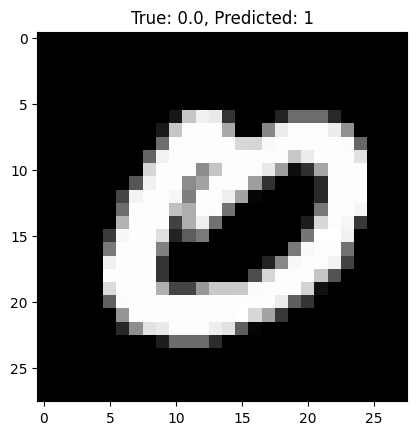

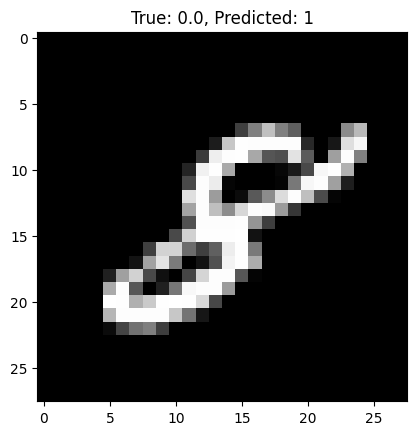

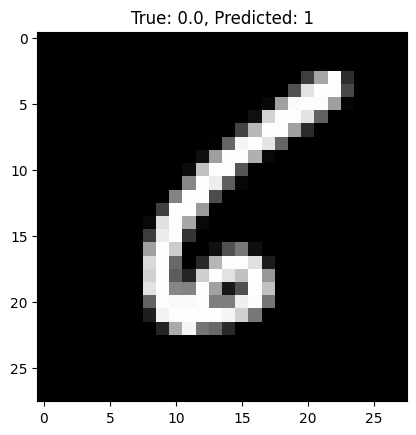

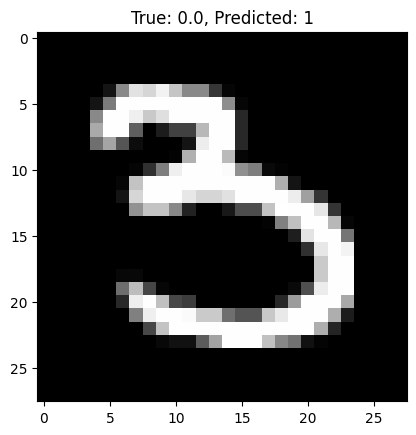

In [40]:
# Mostrar imágenes de errores de clasificación
errors_idx = np.where(y_pred_binary.flatten() != y_val)[0][:80]
for idx in errors_idx:
    plt.imshow(x_val[idx], cmap='gray')
    plt.title(f"True: {y_val[idx]}, Predicted: {y_pred_binary[idx][0]}")
    plt.show()

Reporte de accuracy, precisión, recall y f1-score para las clases del 1 y 0 usando classification_report de Sci-kit Learn.

In [41]:
# Calcular y mostrar métricas de clasificación
print("Classification Report:")
print(classification_report(y_val, y_pred_binary))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97      1097
         1.0       0.96      0.97      0.97      1072

    accuracy                           0.97      2169
   macro avg       0.97      0.97      0.97      2169
weighted avg       0.97      0.97      0.97      2169



La curva ROC (Receiver Operating Characteristic) representa el rendimiento de un modelo de clasificación binaria a diferentes niveles de umbral de decisión. Muestra la tasa de verdaderos positivos (Sensibilidad o TPR) en el eje y y la tasa de falsos positivos (FPR) en el eje x. \\
Se calcula el área bajo la curva usando AUC.

In [42]:
# Calcular y graficar la curva ROC
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)

Sensibilidad (TPR): Mide la proporción de ejemplos positivos que fueron correctamente clasificados como positivos. Se calcula como TP / (TP + FN), donde TP es el número de verdaderos positivos y FN es el número de falsos negativos.

FPR (Tasa de falsos positivos): Mide la proporción de ejemplos negativos que fueron incorrectamente clasificados como positivos. Se calcula como FP / (FP + TN), donde FP es el número de falsos positivos y TN es el número de verdaderos negativos.

La curva ROC se crea al variar el umbral de decisión del modelo y observar cómo cambian TPR y FPR. Un modelo perfecto tendría una curva ROC que se elevaría rápidamente hacia el rincón superior izquierdo del gráfico, indicando una alta Sensibilidad y baja Tasa de Falsos Positivos.

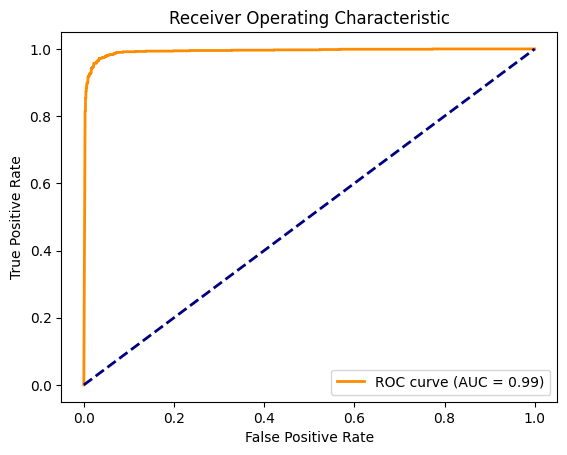

In [43]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

El umbral óptimo se eligio donde la diferencia (TPR - FPR) es máxima (argmax(tpr-fpr)), lo que equilibra la tasa de verdaderos positivos y la tasa de falsos positivos de manera efectiva. \\
Aunque puede haber casos donde querramos otro equilibrio y decantemos por elejir el umbral mediante otro criterio.

In [44]:
# Encontrar el umbral óptimo
optimal_threshold_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_threshold_idx]
print(f"Optimal Threshold: {optimal_threshold}")

Optimal Threshold: 0.5898144245147705
